In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime

In [31]:
# pip install DateTime

In [32]:
start=datetime(2021, 1, 1)

In [33]:
end=datetime(2021, 12, 1)

In [34]:
df= pdr.DataReader(name='AAPL', data_source='stooq', start=start, end=end)

In [35]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-01,166.512,169.313,163.581,163.820,1.533076e+08
2021-11-30,159.065,164.568,159.005,164.348,1.750582e+08
2021-11-29,158.457,160.251,157.878,159.324,8.926329e+07
2021-11-26,158.646,159.523,155.456,155.904,7.740641e+07
2021-11-24,159.823,161.199,158.726,160.999,6.986677e+07


In [36]:
df=df.reset_index()

In [37]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [38]:
data = df
X = data[['High','Low','Open','Volume']]
y = data['Close'].values

In [39]:
X = data[['High','Low','Open','Volume']].values

In [40]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [41]:
regressor = LinearRegression()

In [42]:
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
print(regressor.coef_)

[ 1.10391642e+00  4.29836478e-01 -5.50302233e-01 -1.58711502e-08]


In [44]:
print(regressor.intercept_)

2.7858419205129223


In [45]:
predicted = regressor.predict(X_test)

In [46]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [47]:
R2_score = r2_score(y_test,predicted)

In [48]:
print("training score = ",regressor.score(X_train, y_train))
print("Testing score = ",regressor.score(X_test, y_test))
print("Mean Absolute error =",mean_absolute_error(y_test,predicted))
print("Mean Squared error =",mean_squared_error(y_test,predicted))
print("Root Mean Squared error=",np.sqrt(mean_squared_error(y_test,predicted)))
print("R2score = " ,R2_score)

training score =  0.9929726911633181
Testing score =  0.9952894205447974
Mean Absolute error = 0.6754462322076311
Mean Squared error = 0.8056208539162387
Root Mean Squared error= 0.8975638439221127
R2score =  0.9952894205447974


In [49]:
df4=pd.DataFrame(predicted, columns=['pred'])

In [50]:
df4['test']=pd.DataFrame(y_test)

In [51]:
df4.head()

,pred,test
0,144.926224,144.379
1,147.441768,147.560
2,147.506925,148.018
3,147.807285,147.281
4,145.127053,144.809


<AxesSubplot:>

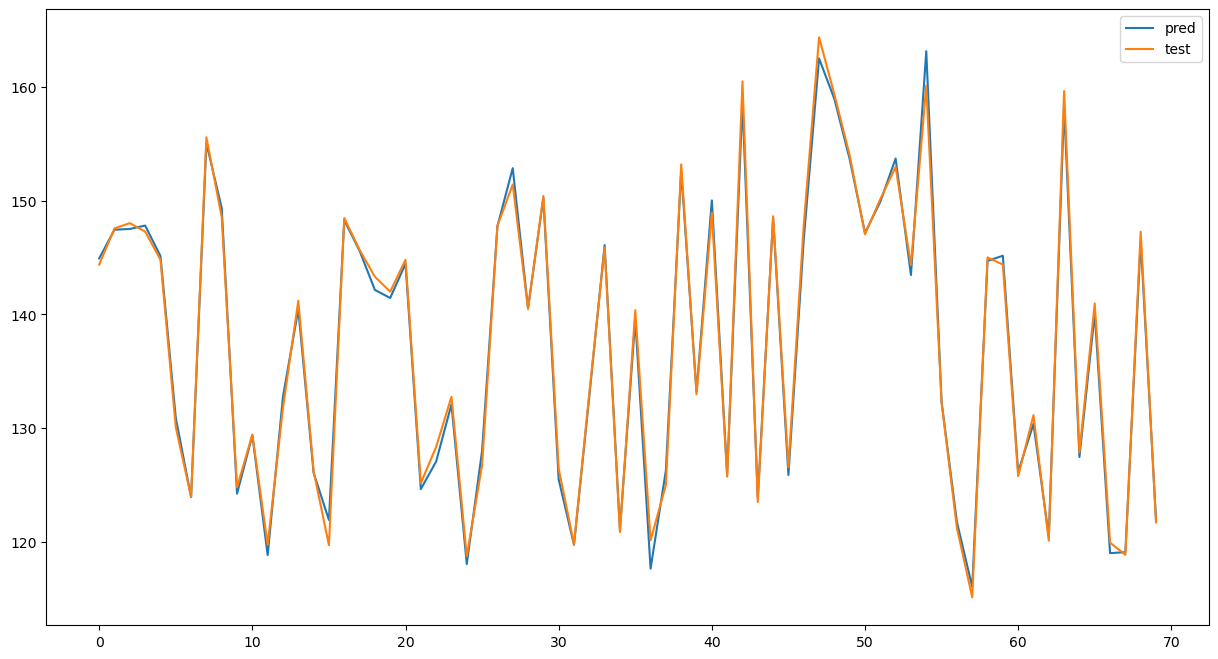

In [52]:
df4.plot(figsize=(15,8))

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [54]:
R2_score = r2_score(y_test,y_pred)
print("training score =", rf.score(X_train, y_train))
print("Testing score =", rf.score(X_test, y_test))
print("Mean Absolute error =",mean_absolute_error(y_test,y_pred))
print("Mean Squared error =",mean_squared_error(y_test,y_pred))
print("Root Mean Squared error=",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2score = " ,R2_score)

training score = 0.9973003475962916
Testing score = 0.9892283978775315
Mean Absolute error = 0.9318820000000047
Mean Squared error = 1.8421995388199726
Root Mean Squared error= 1.3572765152392392
R2score =  0.9892283978775315


In [55]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred =dtr.predict(X_test)

In [56]:
R2_score = r2_score(y_test,y_pred)
print("training score =", dtr.score(X_train, y_train))
print("Testing score =", dtr.score(X_test, y_test))
print("Mean Absolute error =",mean_absolute_error(y_test,y_pred))
print("Mean Squared error =",mean_squared_error(y_test,y_pred))
print("Root Mean Squared error=",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2score = " ,R2_score)

training score = 1.0
Testing score = 0.983908552541587
Mean Absolute error = 1.2731714285714268
Mean Squared error = 2.7520193142857066
Root Mean Squared error= 1.6589211296157833
R2score =  0.983908552541587


In [57]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
y_pred =svr.predict(X_test)

In [58]:
R2_score = r2_score(y_test,y_pred)
print("training score =", svr.score(X_train, y_train))
print("Testing score =", svr.score(X_test, y_test))
print("Mean Absolute error =",mean_absolute_error(y_test,y_pred))
print("Mean Squared error =",mean_squared_error(y_test,y_pred))
print("Root Mean Squared error=",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2score = " ,R2_score)

training score = 0.07344820732064461
Testing score = -0.00906965425529127
Mean Absolute error = 11.441147332169388
Mean Squared error = 172.57485289294448
Root Mean Squared error= 13.136774828432756
R2score =  -0.00906965425529127
